In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

# 128. Logistic Regression with Scikit-Learn - Part One - EDA

In [ ]:
df_path = Path.cwd() / '..' / 'data' / 'hearing_test.csv'

df = pd.read_csv(df_path)

In [ ]:
df.describe()

In [ ]:
df['test_result'].value_counts()

In [ ]:
sns.countplot(data=df, x='test_result')

In [ ]:
sns.boxplot(data=df, y='physical_score', x='test_result')

In [ ]:
plt.figure(figsize=(10, 6), dpi=200)

sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

In [ ]:
sns.pairplot(data=df, hue='test_result')

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

# 129. Logistic Regression with Scikit-Learn - Part Two - Model Training

In [ ]:
X = df.drop('test_result', axis=1)

In [ ]:
y = df['test_result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
help(LogisticRegression)

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train, y_train)

In [ ]:
log_model.coef_

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
y_pred

# 130. Classification Metrics - Confusion Matrix and Accuracy

# 133. Logistic Regression with Scikit-Learn - Part Three - Performance Evaluation


In [ ]:
log_model.coef_

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [ ]:
len(y_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [ ]:

PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [ ]:
fig, ax = plt.subplots(dpi=200)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

In [ ]:
log_model.predict_proba(scaled_X_test)[0]

In [ ]:
y_test.iloc[0]

# 134. Multi-Class Classification with Logistic Regression - Part One - Data and EDA

In [ ]:
df_path = Path.cwd() / '..' / 'DATA' / 'iris.csv'
df = pd.read_csv(df_path)

In [ ]:
df.head()

In [ ]:
df['species'].value_counts()

In [ ]:
sns.countplot(data=df, x='species')

In [ ]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [ ]:
sns.pairplot(data=df, hue='species')

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
X = df.drop('species', axis=1)

In [ ]:
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

# 135. Multi-Class Classification with Logistic Regression - Part Two - Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

In [ ]:
penalty = ['l1', 'l2']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {
              'penalty': penalty,
              'l1_ratio': l1_ratio,
              'C': C
}

In [ ]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [ ]:
grid_model.fit(scaled_X_train, y_train)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
grid_model.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [70]:
y_pred = grid_model.predict(scaled_X_test)

In [72]:
accuracy_score(y_test, y_pred)

1.0

In [73]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

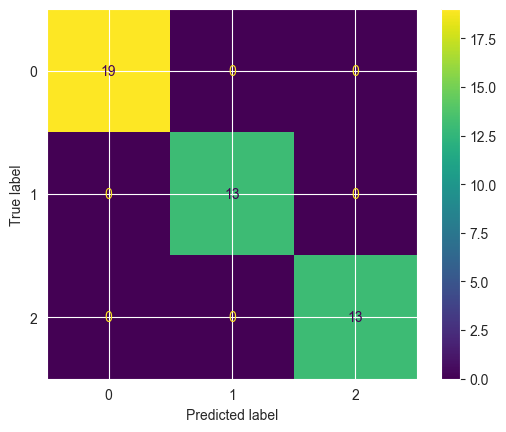

In [85]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()